In [14]:
options(repr.plot.width=12, repr.plot.height=8)
install.packages("shape")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Introduction to hydrographs, chemographs, concentrations, and loads

At the end of this lab, you should be able to:

- Recognize a hydrograph and name its descriptors
- Calculate cumulative flow volumes 
- Construct flow duration curves and compare them between small and large watersheds
- Recognize a chemograph and define its descriptors
- Summarize what the arithmetic average and median concentrations are for common pollutants in mostly agricultural watersheds
- Calculate cumulative loads at the event and yearly scale
- Distinguish between arithmetic and flow weighted concentrations for a variety of common pollutants in mostly agricultural watersheds
- Recognize the importance of high flows to the export of pollutants in watersheds

</br></br>

## 1. Hydrographs as the basic hydrologist tool

In hydrology, we work with time series of flow rates and concentrations, and many of the conclusions we make are based on the calculations of water and nutrient fluxes. The title of this paragraph is time series. Indeed, in hydrology we measure flow not on a continuous basis, but rather at a given frequency. In hydrology, we have been able to make measurements at a high frequency (hourly or smaller), for over 100 years. From this high frequency data, it is possible to obtain a visual representation of the variations of flow. 

The first example below is an example of what we refer to as a simple hydrograph, which follows a rainfall event, with an initial baseflow, a rapidly rising limb, a flow peak, and a more slowly falling limb.





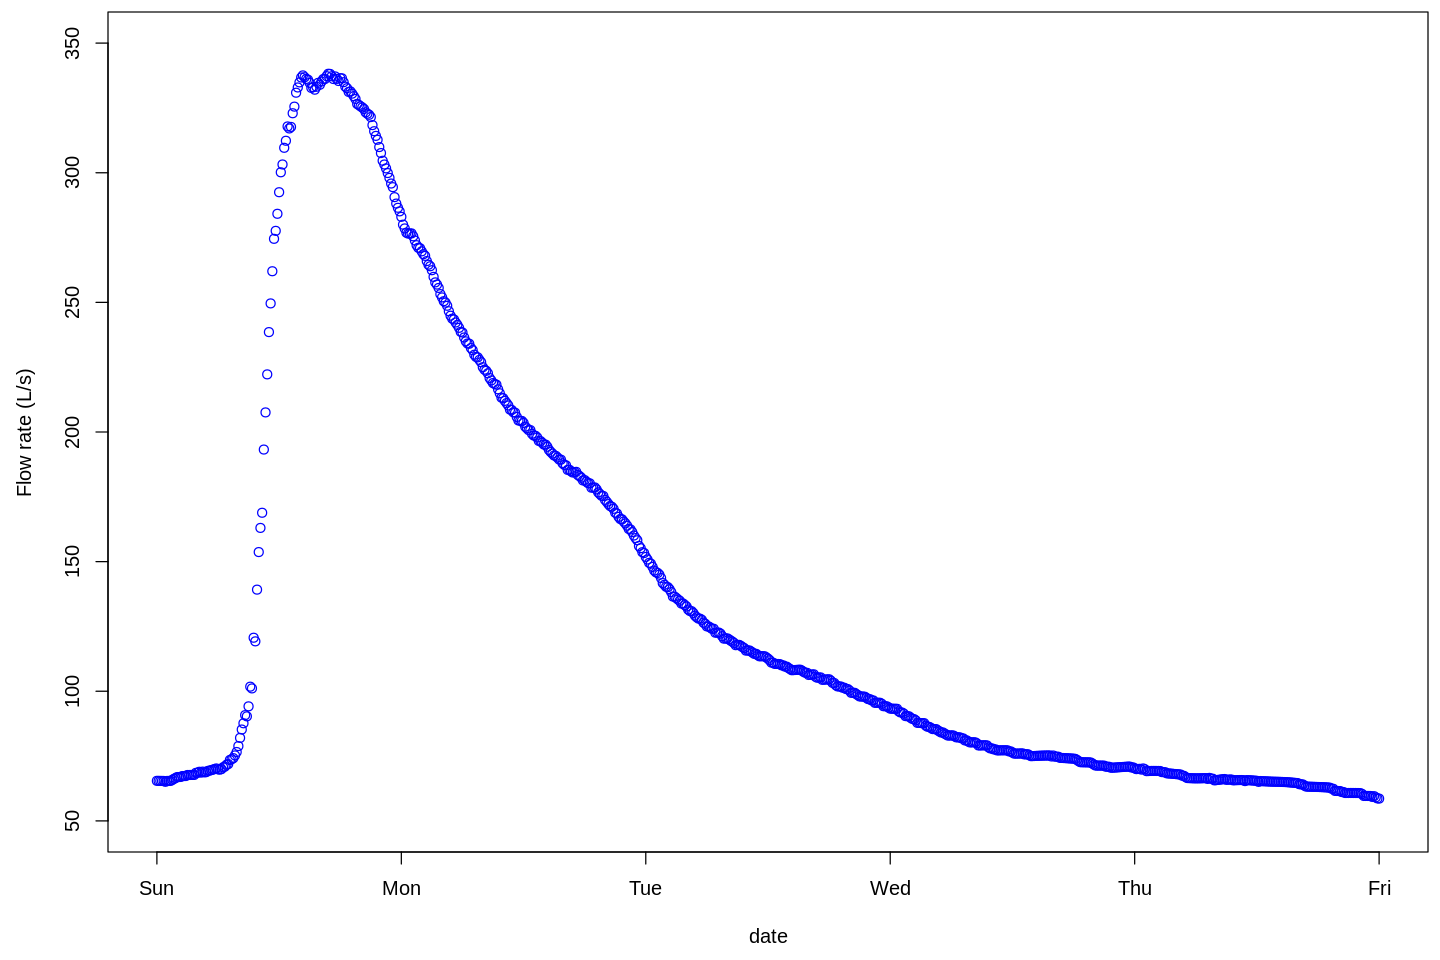

In [15]:
hydgph<-read.csv(file = "hydgph.csv", header = TRUE)
names(hydgph)=c("date","Q","NO3") # this renames the columns of the object 'hydgph' 
date=as.POSIXct(hydgph$date, format = "%Y-%m-%d %H:%M:%S") # transforms the first column of the file, which are characters into dates that R understands
Q=hydgph$Q*1000 # Puts in the variable Q the flow rates, which are orginally in m³/s to L/s for better visualization
par(mar=c(4.5,4.5,0.5,0.5)) # gives sizes of the margin of the displayed plot
xlimHG=as.POSIXct(c("1999-01-03 00:00:00","1999-01-08 00:00:00")) # defines the plotting range for 
      # the x axis and stores it as a date. This is what the as.POSIXct() function does
ylimHG=c(50,350) # defines the plotting range for the y axis


plot(date,Q, # this says the Xaxis values are going to be found in the 'date' vector, and the Yaxis values in the 'Q' vector
  xlab = "date", # this gives the label of the x axis
  ylab = "Flow rate (L/s)", # this gives the label of the Y axis
  type = "p", # this says that data will be illustrated with points "p". "l" would be used to plot lines
  col="blue", # this tells R to plot the data in "blue"
  xlim=xlimHG, # this gives the plotting range limits for the X axis. It is assigned the vector xlimHG defined above
  ylim=ylimHG) # this gives the plotting range limits for the Y axis. It is assigned the vector ylimHG defined above


## 2. Exploration of the data structure

Let us look at what is in the `hydgph`variable now. Using the `head()` function, the number after the comma defines the number of rows to display. Because in the `date` vector, the data is understood as dates, one can do operations between them. 

In [16]:
head(hydgph,5)
head(date)
date[2]-date[1]

,date,Q,NO3
,<chr>,<dbl>,<dbl>
1,1999-01-03 00:00:00,0.06545000,7.600000
2,1999-01-03 00:10:00,0.06543909,7.589091
3,1999-01-03 00:20:00,0.06543000,7.580000
4,1999-01-03 00:30:00,0.06541909,7.579091
5,1999-01-03 00:40:00,0.06541000,7.570000


[1] "1999-01-03 00:00:00 UTC" "1999-01-03 00:10:00 UTC"
[3] "1999-01-03 00:20:00 UTC" "1999-01-03 00:30:00 UTC"
[5] "1999-01-03 00:40:00 UTC" "1999-01-03 00:50:00 UTC"

Time difference of 10 mins

Flow (Q) is in $m^3/s$ and nitrate $NO_3^-$ is in mg N/L. To just look at the flow data, you can type:

In [17]:
head(hydgph$Q,3)

[1] 0.06545000 0.06543909 0.06543000

You can look at the last 6 values of a vector or 6 rows of a vector by using the `tail()` function. 

In [18]:
tail(hydgph$NO3)

[1] 6.920000 6.919091 6.910000 6.909091 6.900000 6.900000

In [19]:
tail(hydgph)

,date,Q,NO3
,<chr>,<dbl>,<dbl>
716,1999-01-07 23:10:00,0.05960000,6.920000
717,1999-01-07 23:20:00,0.05924000,6.919091
718,1999-01-07 23:30:00,0.05954000,6.910000
719,1999-01-07 23:40:00,0.05907091,6.909091
720,1999-01-07 23:50:00,0.05868000,6.900000
721,1999-01-08 00:00:00,0.05860000,6.900000


Or only the first or last value

In [20]:
head(hydgph,1)
tail(hydgph,1)

,date,Q,NO3
,<chr>,<dbl>,<dbl>
1,1999-01-03 00:00:00,0.06545,7.6


,date,Q,NO3
,<chr>,<dbl>,<dbl>
721,1999-01-08 00:00:00,0.0586,6.9


##3. Simple statistic calculations for flow

We can now calculate  and report the mean, maximum, minimum, median flow values

In [21]:
meanQ<- mean(Q)
maxQ<- max(Q)
minQ<- min(Q)
medianQ<- median(Q)
paste0("mean flow is ", meanQ," L/s") # the function 'paste0' concatenates text and variables together

[1] "mean flow is 136.04668512752 L/s"

Obviously there are too many digits to report flow. There is a nice function that will give three significant digit numbers: `signif(number,3)`for 3 significant numbers to be reported. The function `paste0()` essentially concatenates text and variable. In `R markdown` you can actually directly insert code in the middle of your normal `markdown` text. 

For example, in `R markdown`, you would write:

</br>

```The mean flow for this event was `r signif(meanQ,3)` L/s ```

</br>

and it would actually concatenate everything for you and insert the value in the middle of the text. The back tick followed by r ``` `r ` ``` tells R markdown that this is embedded code and that `R` must calculate what is in there, and that within the text. 


But in Colab, this is not possible and one way to report things are as follow:

In [22]:
paste0("mean flow is ", signif(meanQ,3)," L/s")
paste0("median flow is ", signif(medianQ,3)," L/s")
paste0("max flow is ", signif(maxQ,3)," L/s")
paste0("min flow is ", signif(minQ,3)," L/s")

[1] "mean flow is 136 L/s"

[1] "median flow is 98 L/s"

[1] "max flow is 338 L/s"

[1] "min flow is 58.6 L/s"

## 4. Simple hydrograph features

Although the points are disjointed, it is very tempting to add a line between them, as our observations and intuitions tell us that there is a pattern of flow up or down, and in this example, the time interval between consecutive values is 600 seconds or 10 min. And indeed, this is exactly what people do, we add lines between points as an approximation of what flow must have looked like during the measurement intervals. The same data plotted without the measurement points looks like the figure below, appears *continuous*, although it is not!

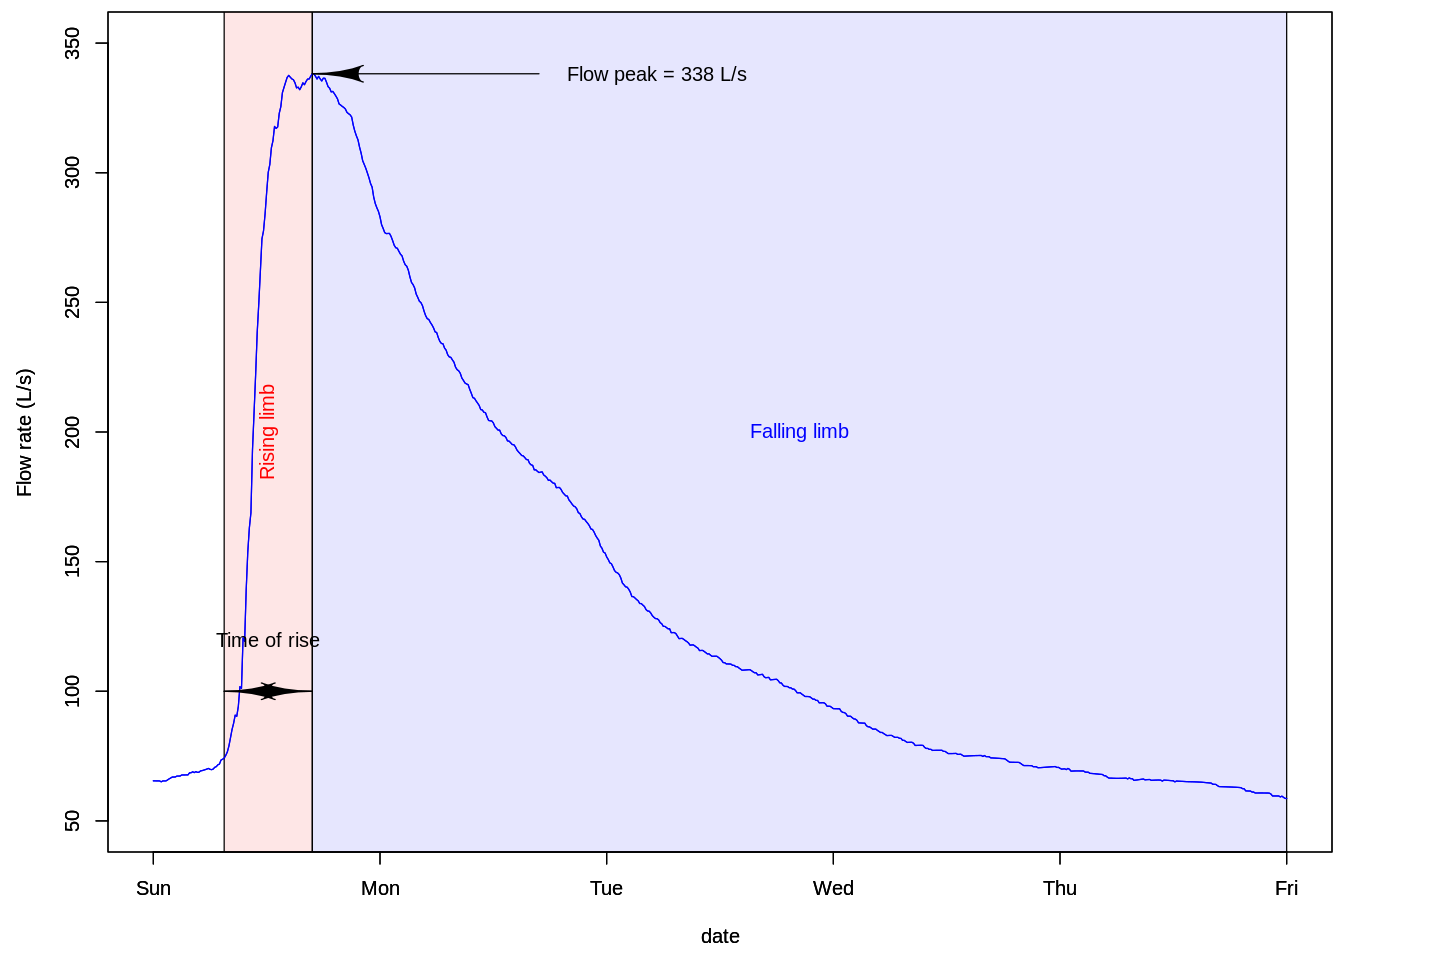

In [23]:

library(shape)
  par(mar=c(4.5,4.5,0.5,4.5))
  options(repr.plot.width=12, repr.plot.height=8)
  transpred <- rgb(250, 0, 0, max = 255, alpha = 25) # this defines the color of the transparent color of the pinkish rectangle
  transpblue <- rgb(0, 0, 250, max = 255, alpha = 25) # this defines the color of the transparent color of the red rectangle
  xlimHG=as.POSIXct(c("1999-01-03 00:00:00","1999-01-08 00:00:00"));ylimHG=c(50,350) # this defines the plotting ranges for the x and y axes
  flowpeak<-max(Q) # this calculates the flow rate at the peak
  peaktime<-as.POSIXct(date[which(Q==max(Q))]) # this returns date for the peaktime. The function which(Q==max(Q)) is used to return the row number corresponding to when Q is maximum
  HGbegtime<-as.POSIXct("1999-01-03 7:30:00") # this defines the date for the beginning of the hydrograph
  HGendtime<-as.POSIXct("1999-01-08 00:00:00") # this defines the date for the end of the hydrograph
  
  plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "l",col="blue",xlim=xlimHG,ylim=ylimHG) # this plots the hydrograph
  rect(as.numeric(HGbegtime),0,as.numeric(peaktime),400,col = transpred) # this plots the red rectangle highlighting the period of rising limb
  rect(as.numeric(peaktime),0,as.numeric(HGendtime),400,col = transpblue) # this plots the blue rectangle highlighting the period of falling limb
  par(new=TRUE) # this says that we are plotting additional time series onto the existing plot. Without par(new=TRUE), the previous plot would be overwritten
  
  plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "l",col="blue",xlim=xlimHG,ylim=ylimHG) # plotting the same plot so that it be on top of the rectangles
  text((as.numeric(HGbegtime)+as.numeric(peaktime))/2,200,"Rising limb", col = "red",srt = 90) # adds the text "rising limb" at the right spot inside the red rectangle
  text((as.numeric(peaktime)+as.numeric(HGendtime))/2,200,"Falling limb", col = "blue") # adds the text "falling limb" at the right spot inside the blue rectangle
  Arrows(as.numeric(HGbegtime),100, as.numeric(peaktime),100, arr.adj = 1, code=3) # adds a double sided arrow in the rising limb phase
  text((as.numeric(peaktime)+as.numeric(HGbegtime))/2,120,"Time of rise") # adds text above the double sided arrow in the rising limb phase
  Arrows(as.numeric(peaktime)+24*60*60,flowpeak, as.numeric(peaktime),flowpeak, arr.adj = 1, code=2) # adds a single sided arrow to show the peak
  text(as.numeric(peaktime)+27*60*60,flowpeak,paste0("Flow peak = ",signif(flowpeak,digits = 3)," L/s"),adj = c(0,0.5)) # adds the text with automatic writing of the peak flow rate

## 5. Simplified illustration
### 5.1 Simplified hydrograph for illustration

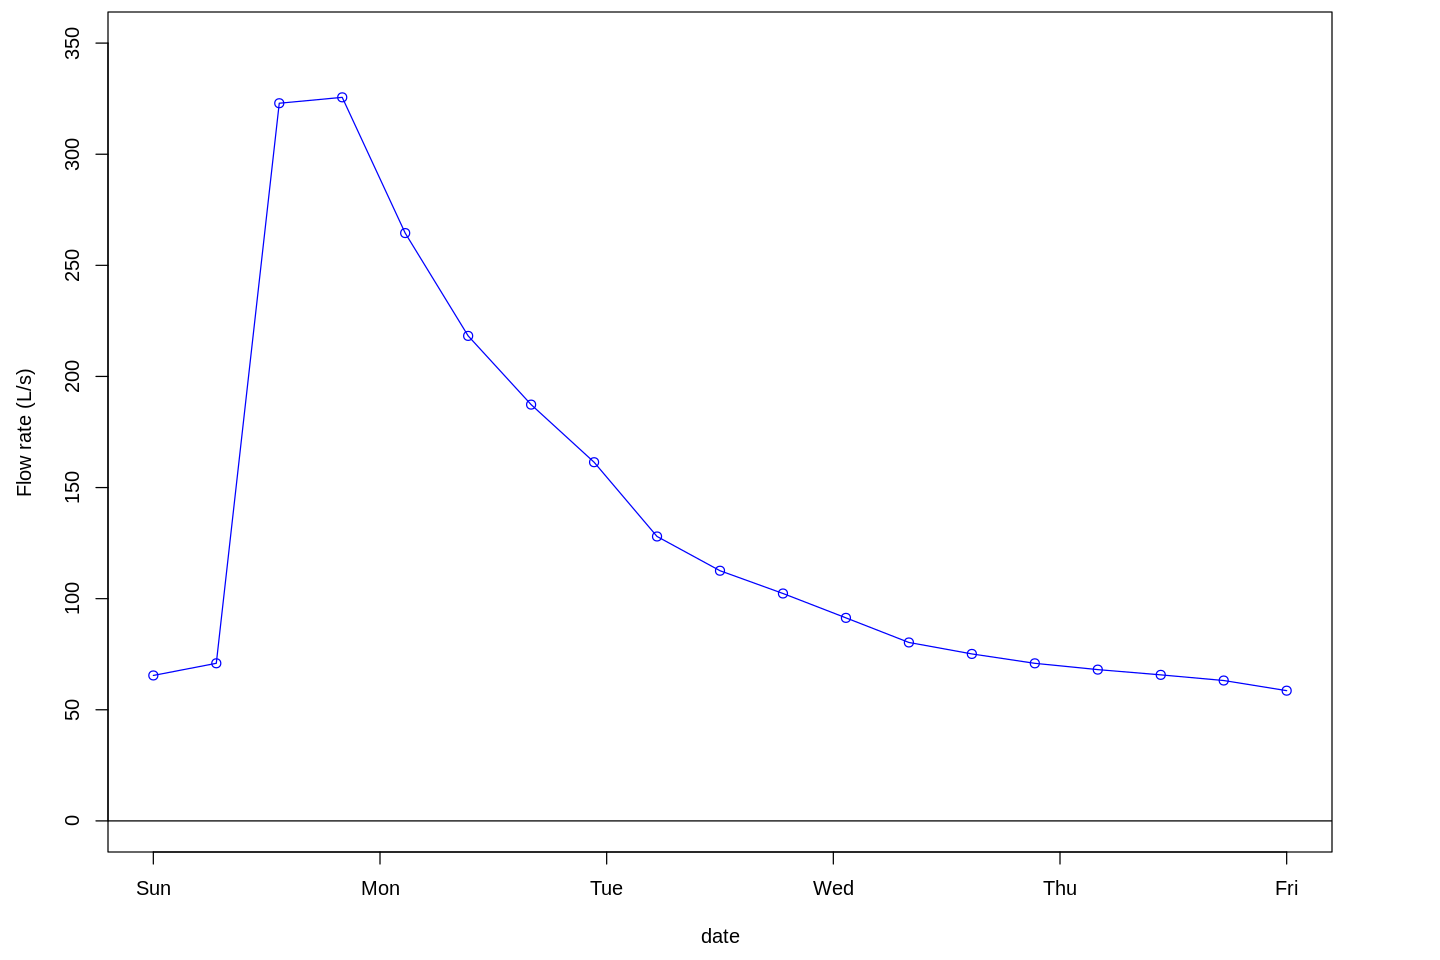

In [24]:
hydgph2<-read.csv(file = "simplified-hydgrph.csv", header = TRUE)
options(repr.plot.width=12, repr.plot.height=8)
names(hydgph2)=c("date","Q","NO3")
date=as.POSIXct(hydgph2$date, format = "%Y-%m-%d %H:%M:%S") # transforms the first column of the file, which are characters into dates that R understands
Q=hydgph2$Q*1000 # Puts in the variable Q the flow rates, which are orginally in m³/s to L/s for better visualization
C=hydgph2$NO3 # puts in the variable C the nitrate concentrations
par(mar=c(4.5,4.5,0.5,4.5)) # this gives the size in line units of the margins of the plot area, from bottom, left, top, and right, in that order
xlimHG=as.POSIXct(c("1999-01-03 00:00:00","1999-01-08 00:00:00"));ylimHG=c(0,350) # this defines the plotting ranges for the x and y axes
ylimC=c(0,8) # this defines the range of concentration for plotting
plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "o",col="blue",xlim=xlimHG,ylim=ylimHG) # this plots the hydrograph
abline(h=0) # this adds a line at the bottom for y=0

### 5.2 Hydrograph and chemograph together

We can now also plot the chemograph, i.e., the concentration as a function of time

[1] 7.600000 7.370000 6.130000 4.469091 4.901818 6.030000 7.160000 7.160000
 [9] 7.170000 7.170000 7.170000 7.170000 7.170000 7.170000 7.170000 7.180000
[17] 7.180000 7.100000 6.900000

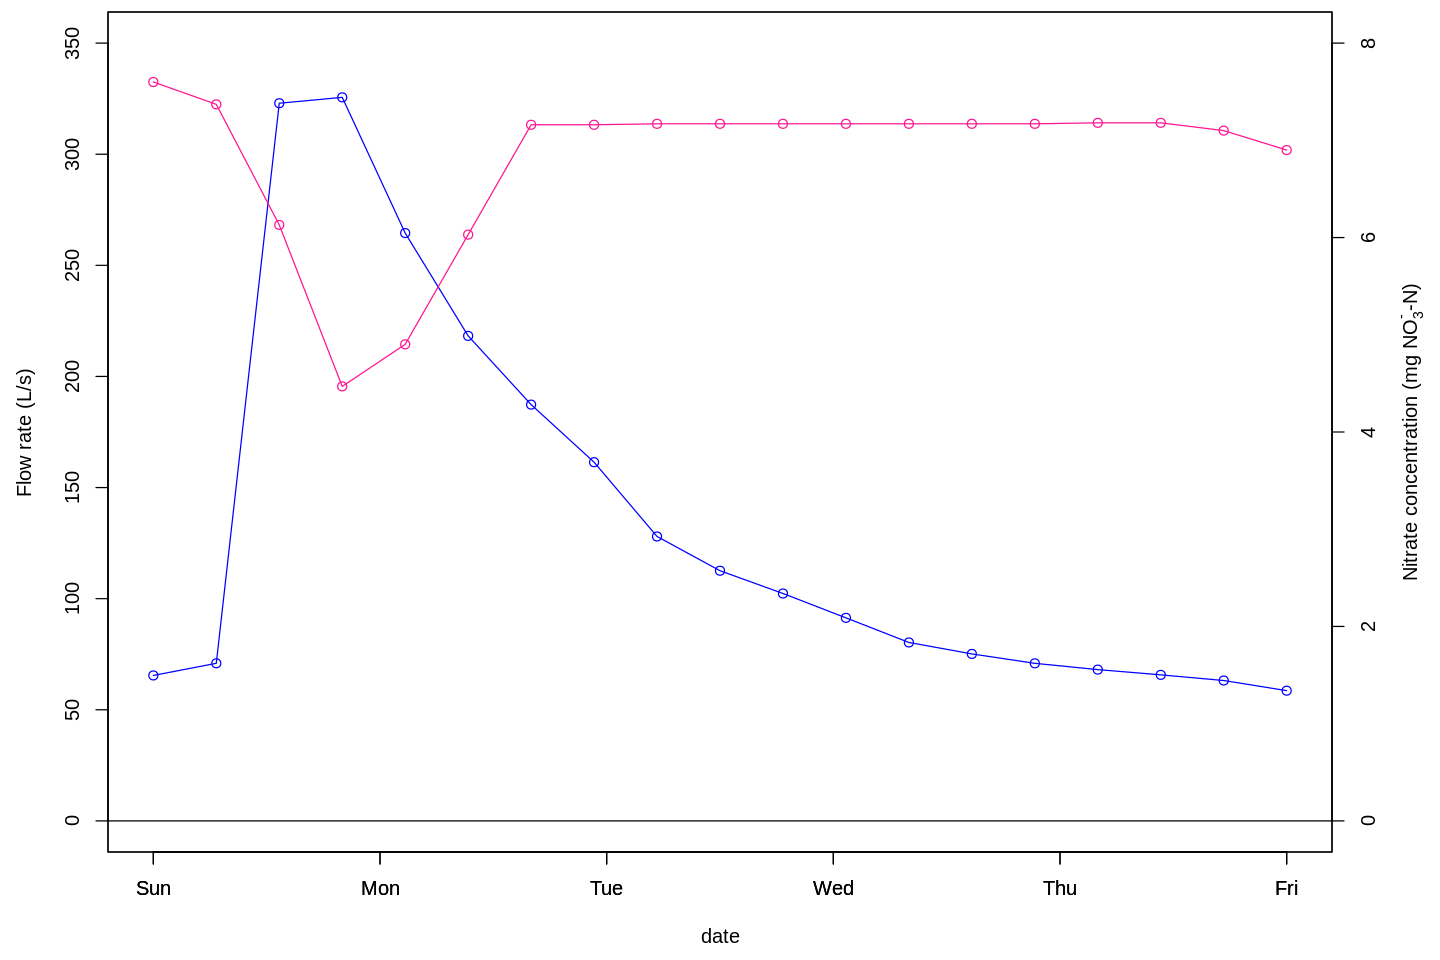

In [25]:
par(mar=c(4.5,4.5,0.5,4.5))
plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "o",col="blue",xlim=xlimHG,ylim=ylimHG) # this plots the hydrograph
par(new = TRUE) # this tells R to plot the next series on the same plot. Otherwise, it will create two different plots
plot(date,C,xlab = "",ylab = "",type = "o",col="deeppink1",xlim=xlimHG,ylim=ylimC, yaxt = "n") #plot the chemograph, telling R not to show y axes because they are already plotted in the first plot
y2lab<-substitute(paste("Nitrate concentration (mg ",NO[x]^{y},"-N)",sep=""),list(x=3,y="-")) # defines the label for concentrations
axis(4) # this tells R to add an axis on side=4 of the plot, side = 1 corresponds to the X, then 2, 3, 4 correspond to left, top, right. So side = 4 corresponds to the secondary axis
abline(h=0) # this adds a line at the bottom for y=0
mtext(y2lab,side=4,line=3) # this adds a label of the secondary y axis (y2lab) in the third line (line = 3) of the margin (mtext) of the 4th side (side = 4)

### 5.3 Simple statistic calculations for concentrations

Calculate and report the mean, maximum, minimum and median nitrate concentrations

In [26]:
paste0("mean nitrate concentration is ", signif(mean(C),3)," mg N/L")
paste0("median nitrate concentration is ", signif(median(C),3)," mg N/L")
paste0("max nitrate concentration is ", signif(max(C),3)," mg N/L")
paste0("min nitrate concentration is ", signif(min(C),3)," mg N/L")

[1] "mean nitrate concentration is 6.81 mg N/L"

[1] "median nitrate concentration is 7.17 mg N/L"

[1] "max nitrate concentration is 7.6 mg N/L"

[1] "min nitrate concentration is 4.47 mg N/L"


### 5.4 Instantaneous load of flux graph: combining hydrograph and chemograph together

To calculate the loads of pollutants or nutrients reaching a treatment system, we use the concept of fluxes and loads. They both refer to a similar concept which is the amount of matter that flows during a given period. Their dimensions are $[M^3.T^{-1}]$, with $M$ refering to *mass*, and $T$ to *time*.

The word flux is generally used to refer to the *instantaneous* metric. Acutally, discharge or flow rates, are *instantaneous* fluxes of water. And the dimensions are $[L^3.T^{-1}]$, where $L$ refers to *length*.

The word load is generally used to refer to a mass of nutrients that has flowed by over a day, week, month, year. For water flow, we often use the expression *flow volume* over a weekly, monthly, yearly period. But for nutrients and pollutants we generally use *nutrient loads* or nutrient *cumulative load*. This is actually somewhat untrue because, it is not rare to read about *instantaneous loads*... 

The instantaneous loads $L$ or fluxes can be calculated as the product of instantaneous flow $Q$ with instantaneous concentrations $C$. 

$L = Q \times C$

In our example, $Q$ and $C$ are actually vectors in `R`, so multiplying `Q*C` yields another vector where each row value is the product of each flow and concentration value.

In [27]:
L=Q*C/1000
ylimLHG = c(0, max(L)) # this establishes the instantaneous load range values for plotting below

Concentrations are in mg N/L, and flow rates are in L/s after correction was made above. The final flux values are thus in mg/s. For illustration purposes, it is better to divide the whole by 1000 to get fluxes in g/s, hence the factor 1000 in the equation above. One can plot what the flux graph looks like below:

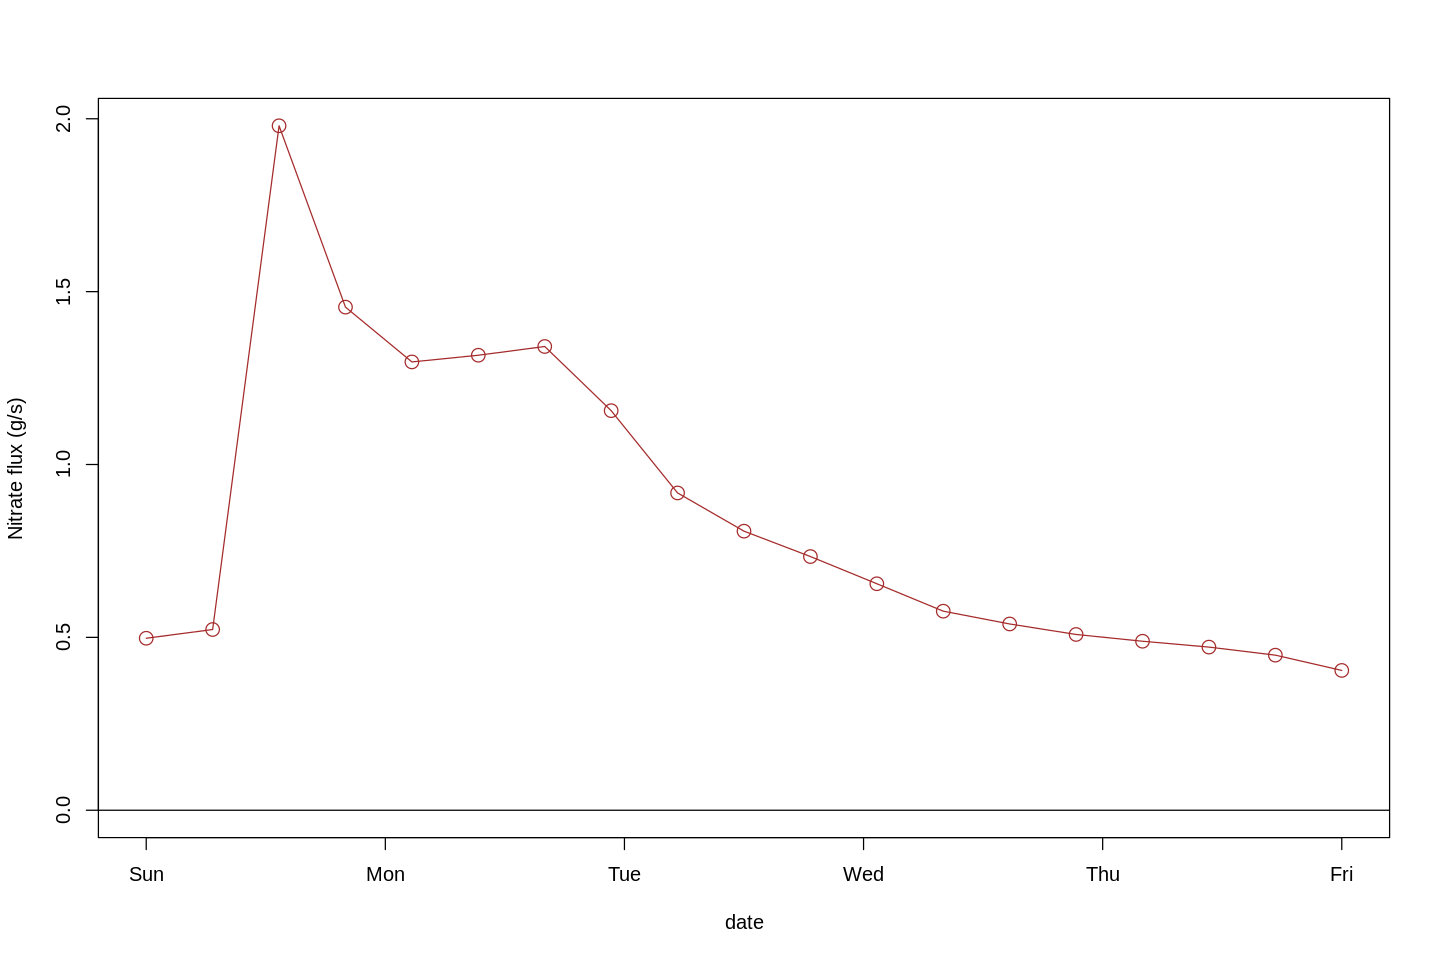

In [28]:
plot(date,L,xlab = "date",ylab = "Nitrate flux (g/s)",type = "o",col="brown",xlim=xlimHG,ylim=ylimLHG, cex = 1.5) # this plots the instantaneous load graph
abline(h=0) # this adds a line at the bottom for y=0


Notice that the general shape of the flux graph follows the hydrograph more than the chemograph. Rather, it is not because the concentrations do decrease during the flow peak that the flux graph will show a dip. In other words, the most important factor for the export of nitrate is flow, followed by concentrations. 

## 6. Calculating flow volumes
  
  Flow peaks matter very much for flooding issues and an entire domain of hydrology and statistical hydrology is devoted to calculating and predicting flow peaks generating floods. For water quality purposes, flow volumes matter just as much as flow peaks do. Indeed, the amount or load of pollutants leaving a field or a watershed, or delivered in a receiving water body, depends on the total volume of water, and, on the concentrations.
  
  Flow volumes or cumulative flows, correspond to the cumulative volume of water that has passed at a particular point over a given period. Mathematically, this means that flow volumes correspond to the integral over time of the instantaneous flow rates. or 

</br>

  $CumulQ = \int_{}^{period}{Q(t).dt}$

</br>
  
  In practice, because the instantaneous flow rates are discrete in time, 
  
</br>

$CumulQ = \sum_{i=1}^{n-1}{\frac{(Q_i + Q_{i+1})}{2}}.time \space interval$

  

### 6.1 Illustration of flow volumes

Cumulative flow volumes correspond to the integration under the hydrograph curve.

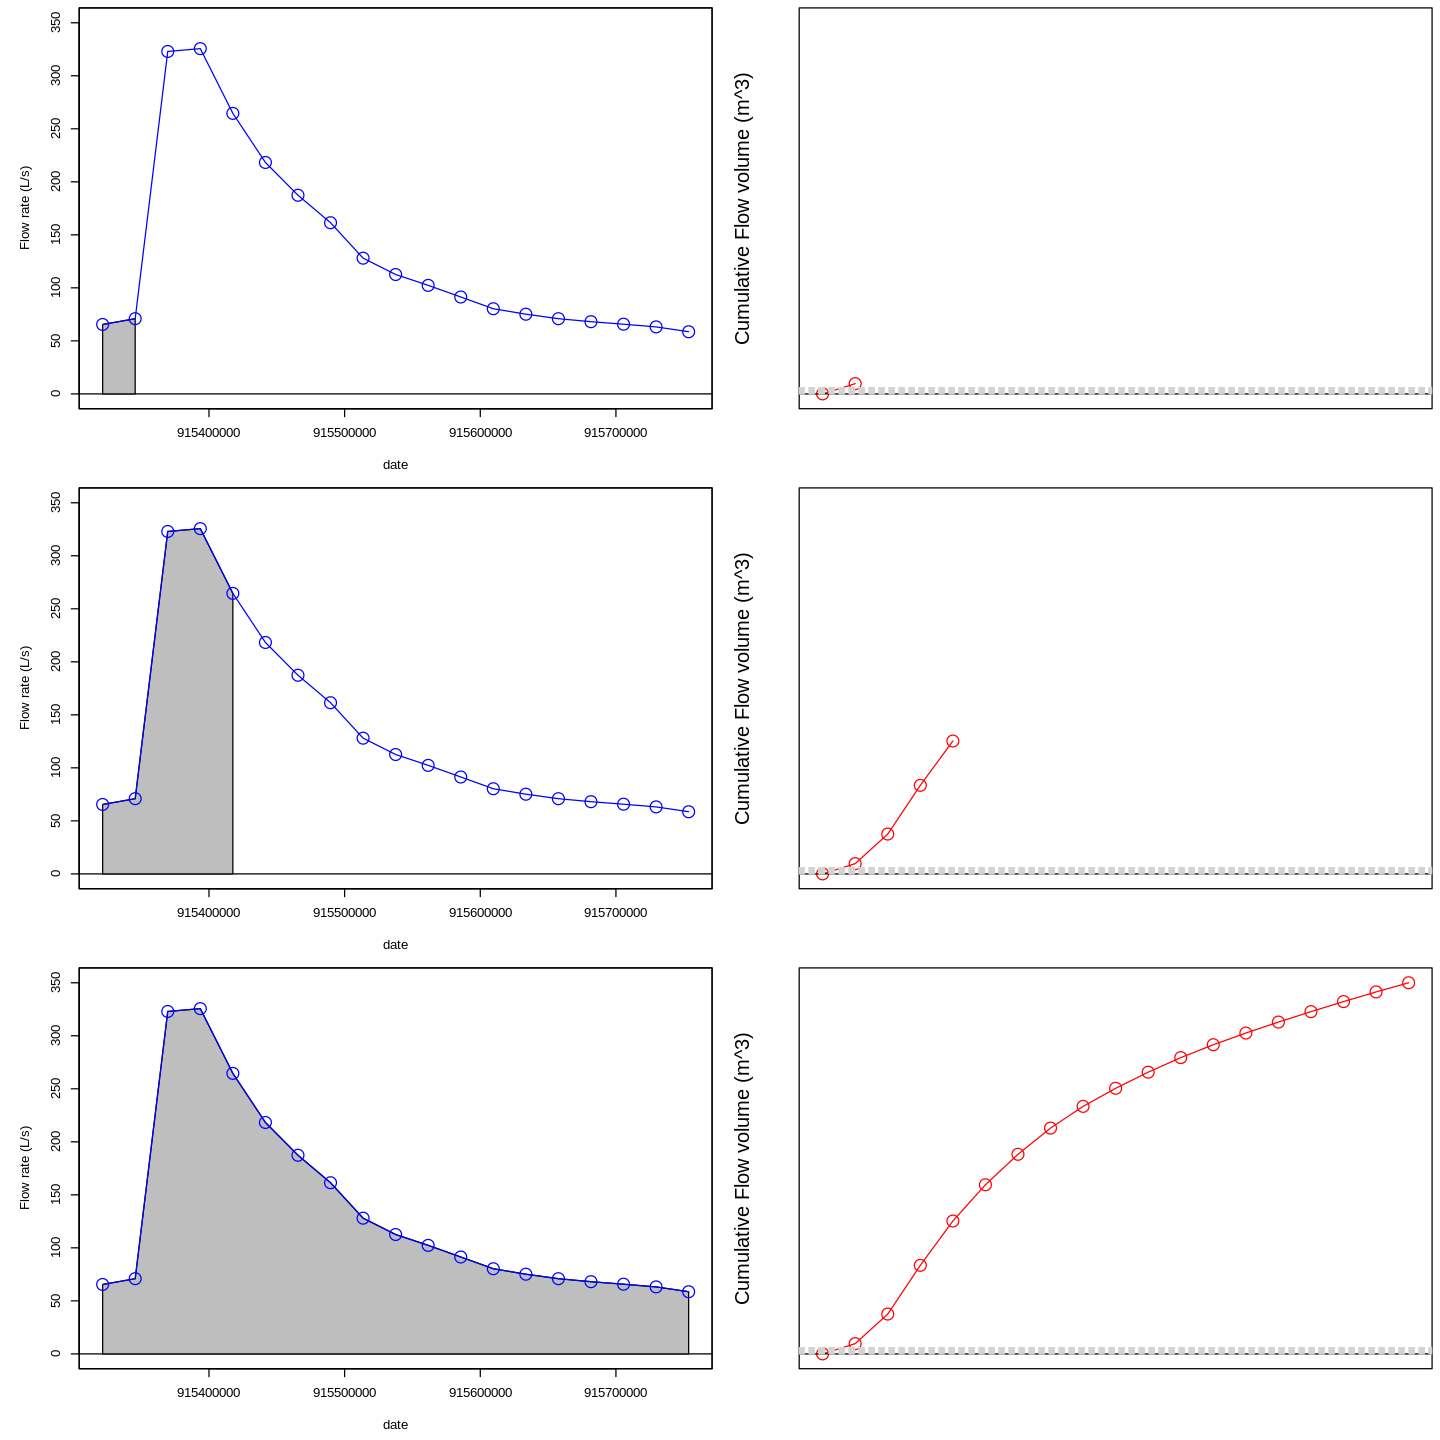

In [29]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow = c(3,2));par(mar=c(4.5,5,0.5,0.5))
  time_Interval <- date[2]-date[1]
      n=c(2,5,19)
  for (i in 1:3){
    plot(0,0,xlab = "date",ylab = "Flow rate (L/s)",type = "o",col="blue",xlim=xlimHG,ylim=ylimHG)
      abline(h=0)
      polygon(c(date[1:n[i]],date[n[i]:1]),c(Q[1:n[i]],rep(0,n[i])),col="grey")
      par(new=TRUE)
      plot(date,Q,col="blue",type="o",cex=2,yaxt="n",     
           xaxt="n",xlab="",ylab="",xlim=xlimHG,ylim=ylimHG)
      
          
  cumQ=c(0,(cumsum(Q[-1])+cumsum(head(Q,-1)))/2)*3600*time_Interval/1000 # calculates in m^3 the cumulative flow for each time stamp 
  
  
  plot(date[1:n[i]],cumQ[1:n[i]],col="red",type="o",cex=2,yaxt="n", 
           xaxt="n",xlab="",ylab="",xlim=xlimHG,ylim=c(0,cumQ[19]))
      abline(h=0)
      abline(h=seq(0,1000,by=50),lty=2,col="lightgrey")
      par(new=TRUE)
      mtext("Cumulative Flow volume (m^3)",side=2,line=3)
  }

### 6.2 Ways to calculate cumulative flow volumes in R

In Excel, it is relatively easy to calculate cumulative flow as one can calculate the volume between two consecutive times, and add that to the previous cumulative volume from the previous cell. 

$CumulQ = \sum_{i=1}^{n-1}{\frac{(Q_i + Q_{i+1})}{2}}.time \space interval$

In `R` it is possible to do the same thing but this involves writing loops and it can be somewhat cumbersome. There is a very nice trick, however, that make things simple.

The first thing to do is to calculate the time interval, and somehow integrate under the hydrograph curve:

In [30]:
time_Interval <- date[2]-date[1]
time_Interval

Time difference of 6.666667 hours

Now a very nice way to automatically calculate cumulative cumulative flow or load uses the formula below. You can see the details of how this works in the `R markdown` document attached with the lab. However, for us, the important point is to use the formula. The factor 3600 is to multiply the number of hours expressed in time_Interval with the number of seconds in an hour, to match the flow unit (L/s). The final numbers are expressed in liters. 

In [31]:
cumulQ=c(0,(cumsum(Q[-1])+cumsum(head(Q,-1)))/2)*3600*time_Interval
cumulQ

Time differences in hours
 [1]        0  1636440  6362880 14145458 21226887 27020138 31887098 36071935
 [9] 39544636 42431302 45010102 47334382 49394214 51259320 53011712 54679352
[17] 56284756 57831338 59292556

To report the total volume of water that flowed during this hydrograph, you could use this code:

In [32]:
paste0("The cumulative flow volume during this hydrograph was ", signif(tail(cumulQ,1),8), " liters or ", signif(tail(cumulQ/1000,1),5), " m^3")

[1] "The cumulative flow volume during this hydrograph was 59292556 liters or 59293 m^3"

Notice the use of the `tail(x,1)` function to get the last value of the `cumulQ` vector.

### 6.3 Calculate the cumulative nitrate load over the event

Calculate and report in the proper unit the cumulative load of nitrate that flowed at the measuring station during the event

In [33]:
cumulL=c(0,(cumsum(L[-1])+cumsum(head(L,-1)))/2)*3600*time_Interval
cumulL

Time differences in hours
 [1]      0.00  12241.20  42269.57  83487.31 116508.44 147860.61 179748.58
 [8] 209712.01 234591.91 255289.30 273779.29 290444.38 305213.38 318586.19
[15] 331150.84 343115.99 354642.79 365686.61 375920.61

## 7. Flow weighted vs arithmetic average concentrations

You have calculated the arithmetic average concentration in a previous section. This gives a precious indication of the overall level of nitrate pollution in the studied stream. 

Multiply the arithmetic average concentration to the total cumulative volume to get an estimate of the cumulative nitrate load over the event. 

Do you get a different value than the one you obtained before?

Let us plot the cumulative load as a function of the cumulative volume.

In [34]:
cumulLoad=mean(C)*tail(cumulQ,1)/1000
as.numeric(cumulLoad)

[1] 403722.7

Time differences in hours
 [1]            0   4942052681  17065186920  33705723908  47037106767
 [6]  59694690724  72568586384  84665503325  94710085583 103066092784
[11] 110530924309 117258998799 123221579950 128620485723 133693122877
[16] 138523724768 143177355121 147635994626 151767696712

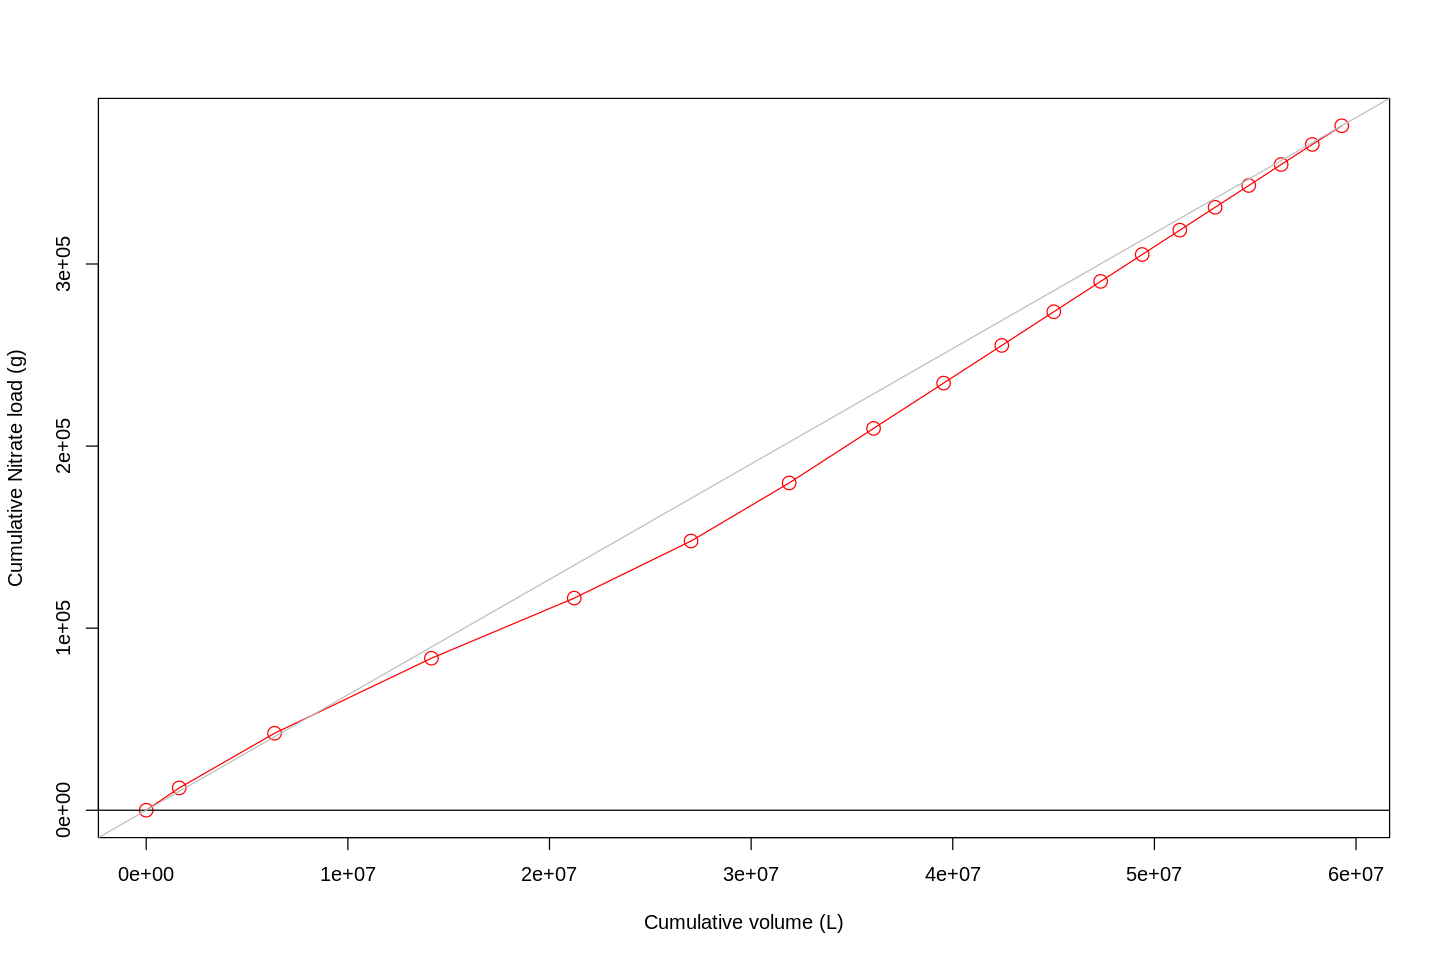

In [35]:
options(repr.plot.width=12, repr.plot.height=8)
plot(cumulQ,cumulL,xlab = "Cumulative volume (L)",ylab = "Cumulative Nitrate load (g)",type = "o",col="red", cex = 1.5) # this plots the instantaneous load graph
abline(h=0) # this adds a line at the bottom for y=0
slope1_1= as.numeric(tail(cumulL,1))/as.numeric(tail(cumulQ,1))
abline(0,slope1_1, col="grey")
cumnitrld=as.numeric(cumulLoad)*cumulL
cumnitrld

As you can see the the cumulative load curve is not straight. The grey line connects the first and last point. The slope of that grey line is thus the total cumulative load divided by the total cumulative volume. Its dimensions are thus mass/volume, i.e., the same dimensions as those of a concentration!!

We call this concentration the **flow weighted average concentration (FWAC)**. The slope of the straight line is in g/L. The **FWAC** expressed in mg N/L can thus be calculated as:

In [36]:
paste0("the flow-weighted average concentration of nitrate during the event is ", signif(slope1_1*1000,3), " mg N/L")
paste0("the arithmetic average concentration of nitrate during the event is ", signif(mean(C),3), " mg N/L")

[1] "the flow-weighted average concentration of nitrate during the event is 6.34 mg N/L"

[1] "the arithmetic average concentration of nitrate during the event is 6.81 mg N/L"

# 8. Evaluating the importance of rare high flow events: flow volume duration curves
  
## 8.1 Sorting flow and load values
  
  Flow occurs in permanent streams throughout the year, but with bursts following rainfall events, which are, in most places on earth relatively rare. For example, in North Carolina, it rains about 7% of the time. Most of the flow occurs after these rare occurrences. The idea behind the ***flow volume duration curve*** concept is to characterize the importance of high flow events in the overall volume of water generated.
  
  Flow duration curves represent the percentage of the total flow volume that occurred in x% of the time corresponding to the highest flows. The same applies for loads. This might sound a bit murky, but hopefully it will not with the further explanations below. To get there, one first needs to order flow and loads in descending order. 

For this, let us take an entire year of data illustrated in the hydrograph below:
 


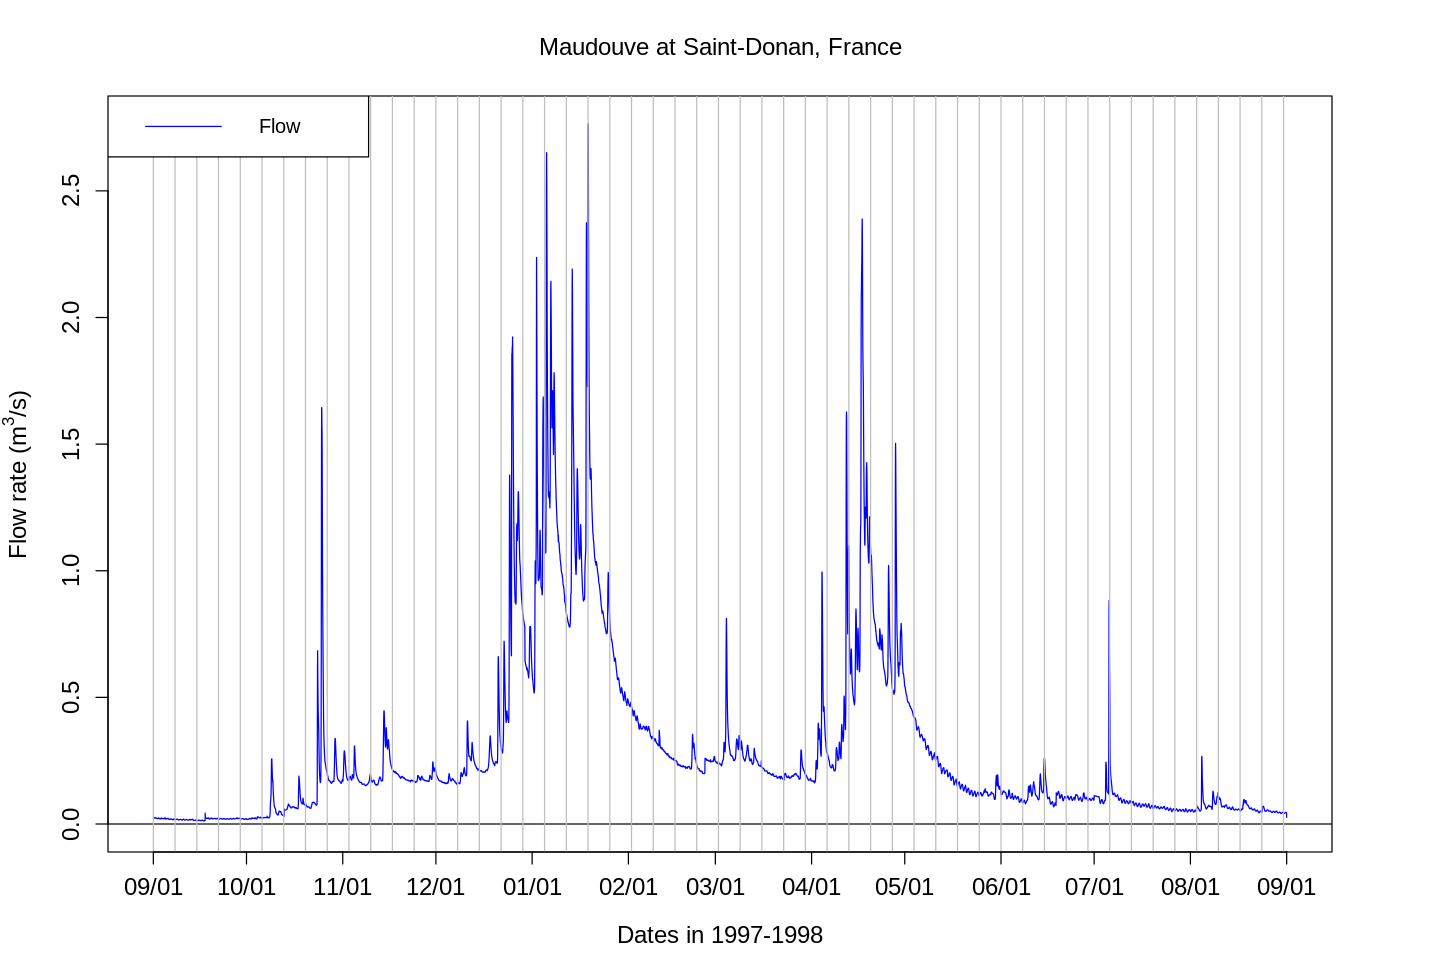

In [37]:
data<-read.csv(file="sample_1hr_QC_data.csv",header = TRUE) #Reads file into table format
  options(repr.plot.width=12, repr.plot.height=8)
  WSarea<-24.2 #Area of watershed in km2
  WS<-"Maudouve at Saint-Donan, France"
# renames the columns in simpler names
  data<-as.data.frame(data)
  data$datetime<-as.POSIXct(strptime(data$datetime, "%Y-%m-%d %H:%M:%S")) # transforms characters into date values understood by R
  D<-data$datetime
  Q<-data$Q   #Defines Q as the flow value (m3/s)
  
  N=nrow(data)   #Sets N to the value equal to the number of total rows in the table
  
  # definition of the x and y axes limits
  
  startdate<-D[1]
  enddate<-D[N]
  xlim = as.POSIXct(c(startdate,enddate))  # this renders the first and last date understandable for plotting purposes
  ylimQ = c(0,max(Q))           # ylim for flow
      
  ScaleF = 1.2                  # scaling factor for size of fonts and other things
      
  y1lab<-expression("Flow rate (" * m^3 * "/s)")  # defines the label for flow
  
  par(mar=c(4.5,4.5,4,4.5))     # defines the sizes, in number of lines, for the margins (bottom, left, top, right)
  
      ltyp=c(1,2)
      
      plot(D,Q,col="blue",type="l",cex=0.1,yaxt="n",     
           lty=ltyp[1],xaxt="n",xlab="",ylab="",xlim=xlim,ylim=ylimQ)
      # we are taking all the default addition of axis tick marks and numbers out by using xaxt and yaxt = "n"
      # and setting the axis labels at nothing using xlab = "" and ylab = ""
      abline(h=0)
      abline(v=seq(startdate, enddate, by="week"),col=("grey"))
      axis.POSIXct(1, at=seq(startdate, enddate, by="month"), format="%m/%d",cex.axis=ScaleF)
      # this tells R that we want the X axis ticks and values to be displayed as dates, be added on a monthly basis,
      # using the month/day format
      axis(2,cex.axis=ScaleF)
      # this tells R that the first Y axis ticks can be displayed  (that function was repressed earlier by 'yaxt="n" ')
      par(new=TRUE)
      # this tells R that a new plot has already been opened, in other words you are telling R to keep adding things
      # on the existing plot
      
      mtext("Dates in 1997-1998",side=1,line=3,cex=ScaleF) # add in the margin the defined labels and title
      mtext(y1lab,side=2,line=3,cex=ScaleF)
      mtext(WS,side=3,line=1.5,cex=ScaleF)
      
      legend("topleft",c("Flow"),lty = c(1), col = c("blue"))

Now, we will sort the flow values in descending order

In [38]:
QSort=sort(Q,decreasing = TRUE)   #Sorts instantaneous flow rates in descending order
  

 One can calculate the cumulative flow associated with the sorted instantaneous flow rates as follows:

In [39]:
cumQSort<-c(0,(cumsum(QSort[-1])+cumsum(head(QSort,-1)))/2)*3600/WSarea/1000
  cumQSortPerc<-cumQSort/tail(cumQSort,1)*100

Now the same hydrograph becomes:

[1] 8761

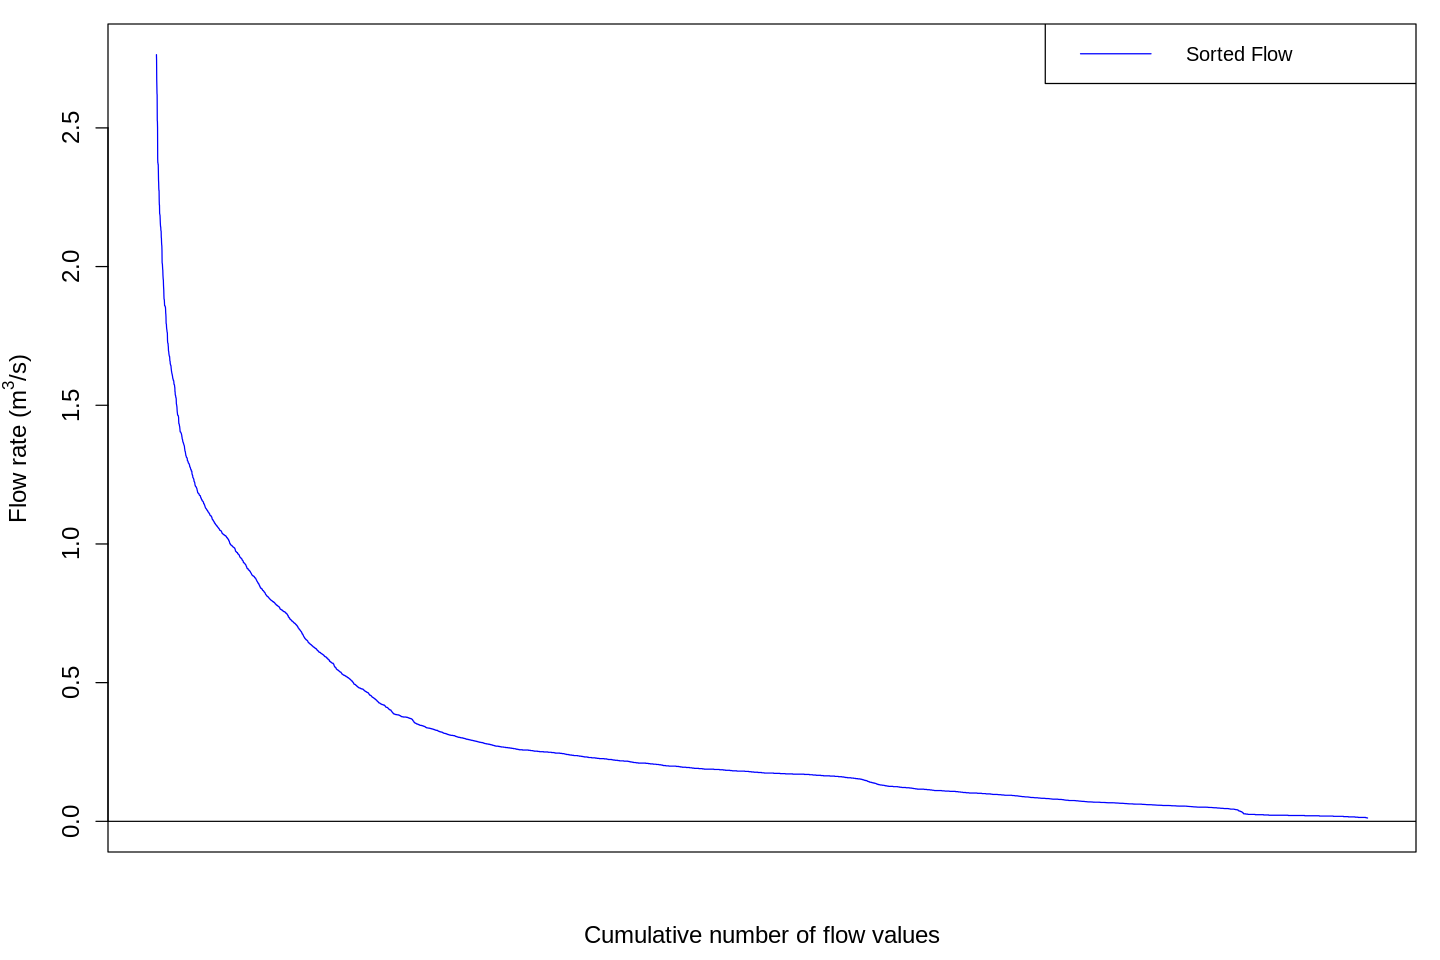

In [40]:
  par(mar=c(4.5,4.5,1,1)) 
  length(QSort)
  plot(1:length(QSort),QSort,col="blue",type="l",cex=0.1,yaxt="n",     
           lty=ltyp[1],xaxt="n",xlab="",ylab="",ylim=ylimQ)
  abline(h=0)    
  axis(2,cex.axis=ScaleF)   
  mtext(y1lab,side=2,line=3,cex=ScaleF)
  mtext("Cumulative number of flow values",side=1,line=3,cex=ScaleF)
  legend("topright",c("Sorted Flow"),lty = c(1), col = c("blue"))

So now the cumulative flow volume curve corresponding to the highest flow rates as a function, not of time anymore but of the cumulative number of flow values looks like this:

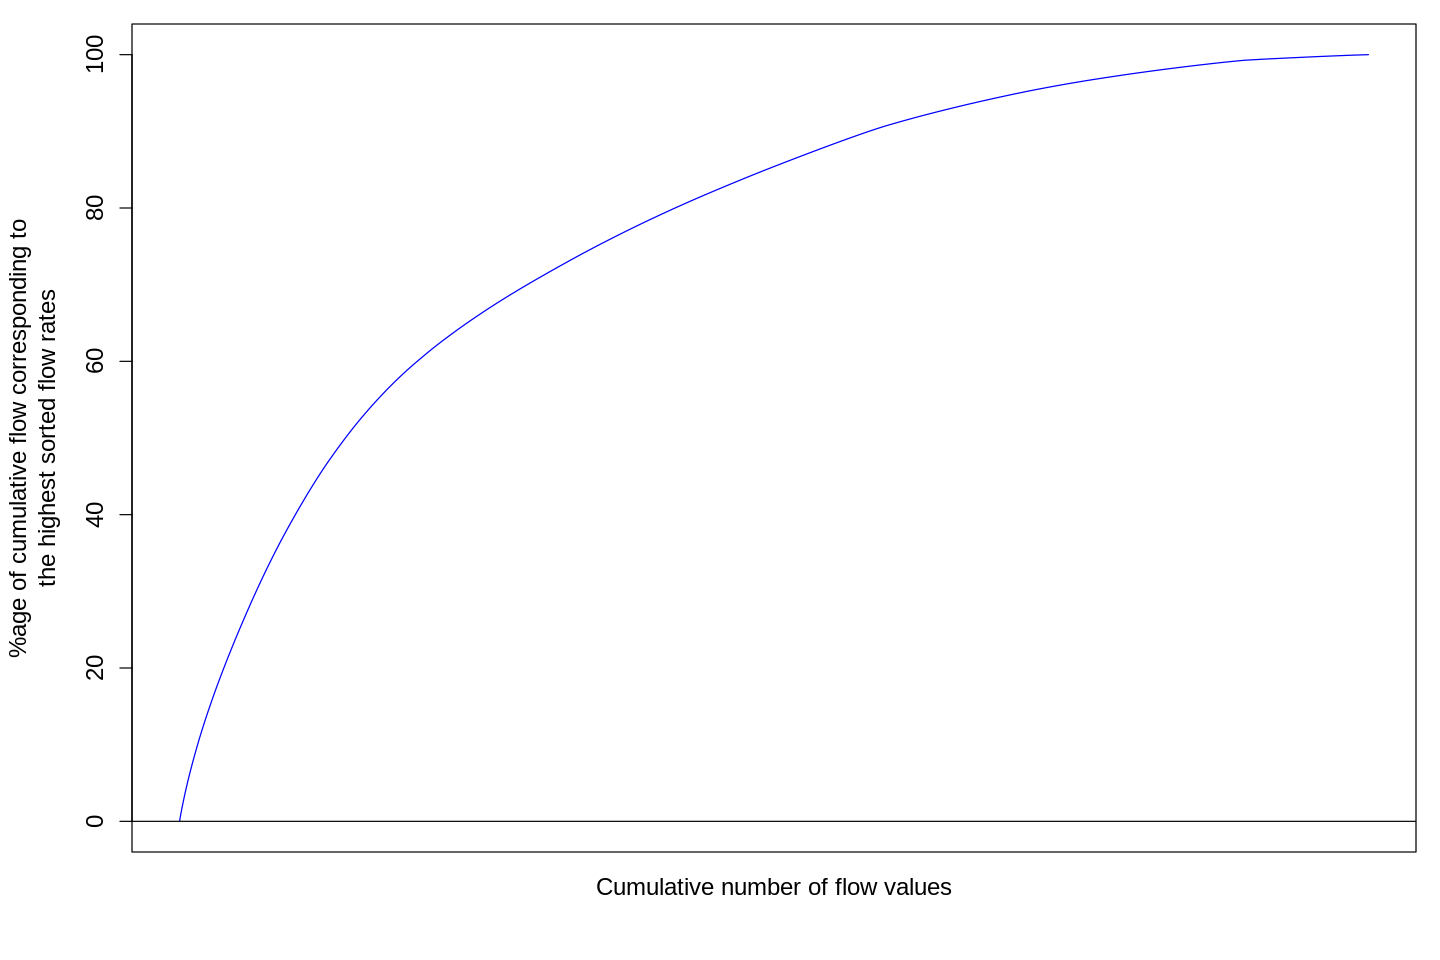

In [41]:

  par(mar=c(4.5,5.5,1,1)) 
  plot(cumQSortPerc,col="blue",type="l",cex=0.1,yaxt="n",     
           lty=ltyp[1],xaxt="n",xlab="",ylab="", ylim=c(0,100))
  abline(h=0)    
  axis(2,cex.axis=ScaleF)
  mtext("Cumulative number of flow values",side=1,line=1,cex=ScaleF)
  mtext("%age of cumulative flow corresponding to\n the highest sorted flow rates ",side=2,line=3,cex=ScaleF)
   # the \n in the text allows for line break in the title 


Notice that the cumulative sorted flow curve does not have the two large increases observed for the months of January and April anymore because all flows are sorted in decreasing order, regardless of when they occurred. 
  
  Notice that there is still no unit added for the x axis because I decided that the cumulative number of flow value does not really add a lot to the analysis.  However, it becomes very interesting to transform these values in probability of occurrence. Each value has 1/N the probability to occur. We can also calculate the cumulative probability of occurrence of flow values.  Flow and load duration curves are thus derived this way.

The previous curves give the semi-continuous duration curves. In practice, we like to use discrete values or percentages to express ourselves. In other words, to characterize the importance of high flow in the generation of flow volume in a watershed, we like to say something like "50% of the flow in that watershed occurred in 10% of the time, corresponding to the highest flow". This provides a way of demonstrating of how relatively flashy the watershed may be, either relatively to other watersheds or to previous years.
  
  The flashiness of a watershed refers to how rapidly flow is altered as a result of storm events/varying conditions.  More frequent spikes in flow in response to precipitation events, in which flow increases and decreases more greatly and rapidly, are typically indicative of watersheds with predominant portions of streamflow being influenced by surface runoff, a quicker responding contributor of water to streamflow.  
  
  Practically, one can associate to each cumulative sorted discharge value a percentage of the total discharge yielding $W_{k\%}$ values (W for Water volume) corresponding to the $k^{th}$ cumulative probability of the time elapsed, with k being an integer. This corresponds to discretize the continuous curves above to 100 points. 
  
  Practically this can be calculated like this:   

In [42]:
Wk=quantile(cumQSort,probs=seq(0.01,1,0.01))/tail(cumQSort,1) #Calculates and assigns Wk% values to a probability occurring in 1-100% of the total time

  and the discretized flow duration curve is illustrated below:

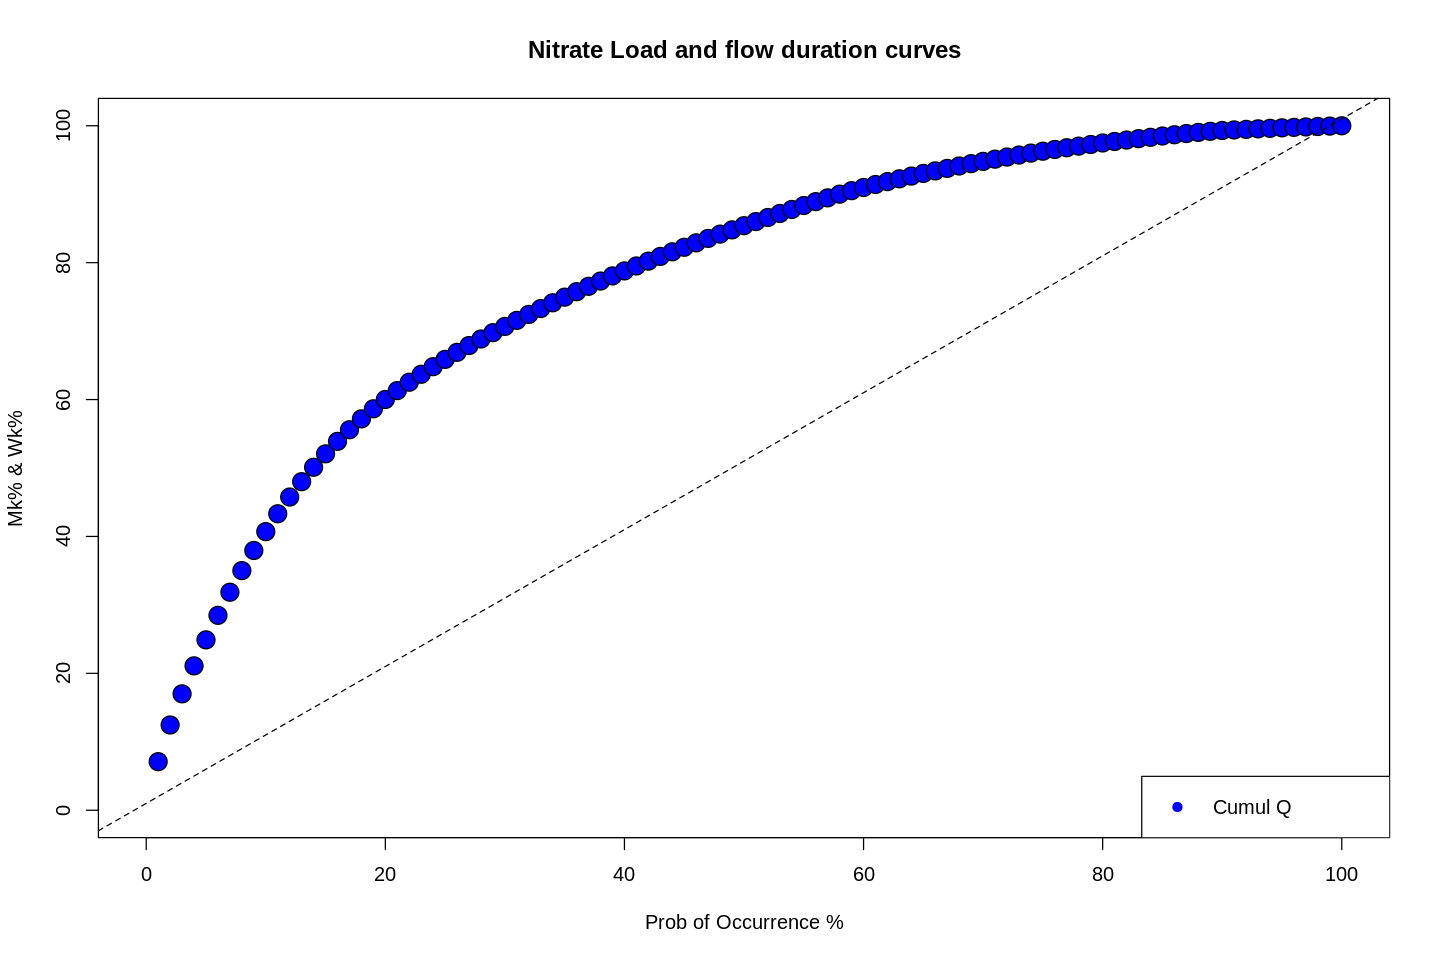

In [43]:
      xlim=c(0,100);ylim=c(0,100);
      plot(1:100,Wk*100,xlab="Prob of Occurrence %",ylab="Mk% & Wk%",xlim=xlim,ylim=ylim,pch=21,col="black",bg="blue", cex = 2)
      par(new=TRUE)
    #  plot(1:100,Mk*100,xlab="Prob of Occurrence %",ylab="Mk% & Wk%",xlim=xlim,ylim=ylim,pch=22,col="black",bg=ColElmt)
    #  par(new=TRUE)
      abline(1,1,col="black",lty="dashed",xlim=xlim,ylim=ylim)
      par(new=TRUE)
      legend("bottomright",c("Cumul Q"),
            pch=c(19),
            col=c("blue"),
            bg="white")
      title(main="Nitrate Load and flow duration curves") # the \n in the text allows for line break in the title

One can then easily report that, for example, in 10% of the time corresponding to the highest flows is:



In [44]:
paste0(signif(Wk[10]*100,digits = 2),"%") # the number 10 in Wk[10] addresses the 10th percentile
# the nth percentile would be written as Wk[n]

[1] "41%"

This watershed is thus relatively flashy as about 41% of its total flow volume occurs in 10% of the time.

In fact we can do the same calculation for the load.

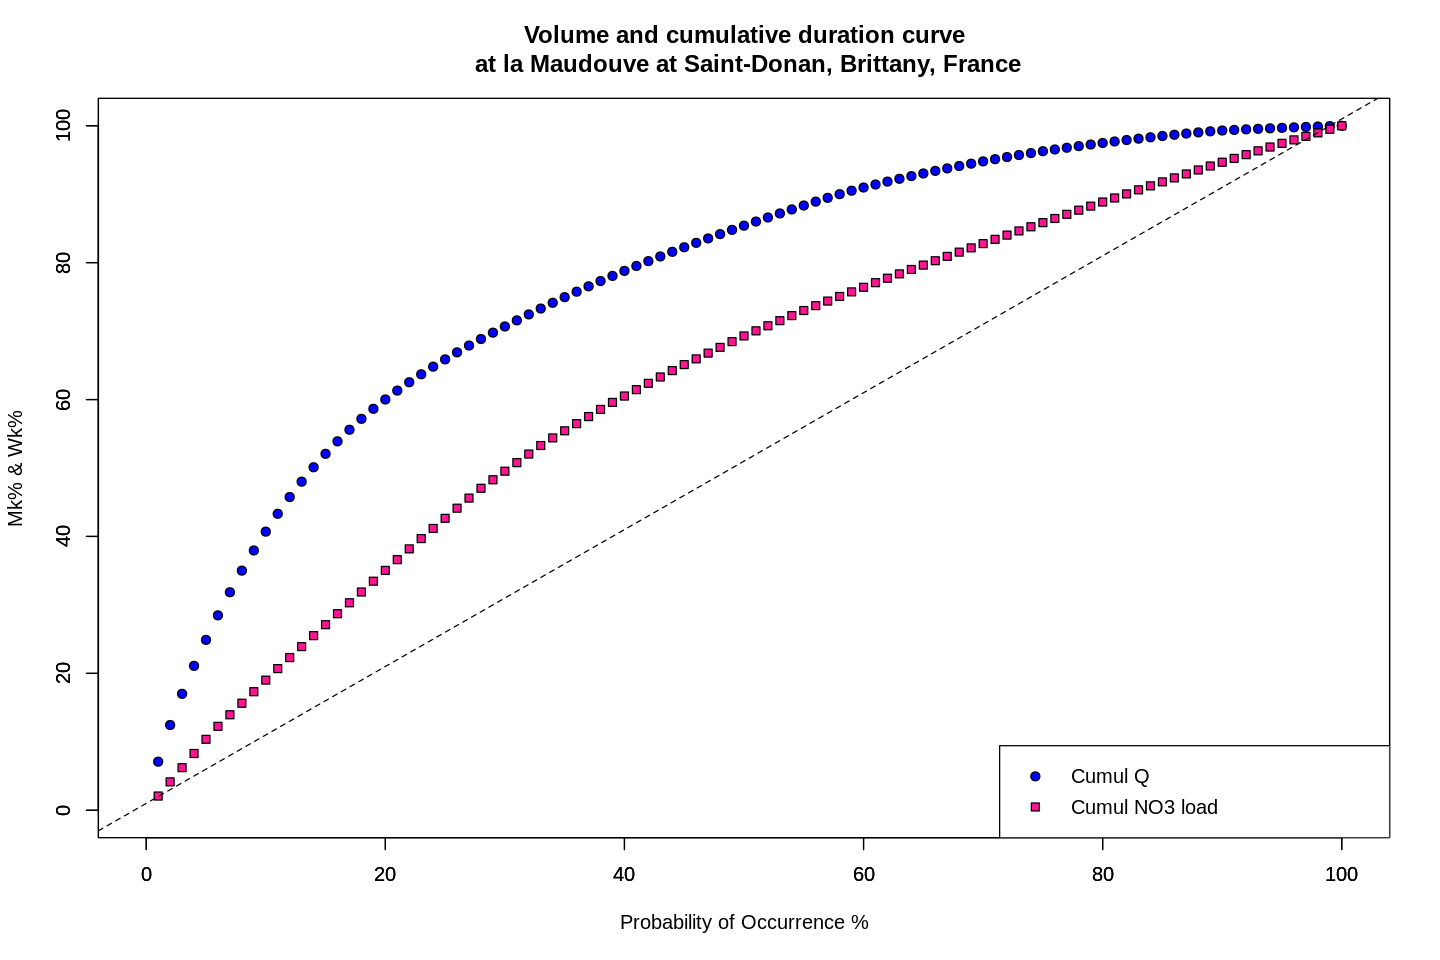

In [45]:
# This part calculates the necessary variable for the cumulative load calculations
  LSort=sort(L,decreasing = TRUE)   #Sorts instantaneous nitrate fluxes in descending order
  cumLSort<-c(0,(cumsum(LSort[-1])+cumsum(head(LSort,-1)))/2)*3600/1000 # This calculates the nitrate load
  cumLSortPerc<-cumLSort/tail(cumLSort,1)*100 # This scales all the nitrate load in percent values
  Mk=quantile(cumLSort,probs=seq(0.01,1,0.01))/tail(cumLSort,1) #Calculates and assigns Mk% values to a probability occurring in 1-100% of the total time
  xlim=c(0,100);ylim=c(0,100) # This defines the limits on the x and y axes
  plot(1:100,Wk*100,xlab="Probability of Occurrence %",ylab="Mk% & Wk%",xlim=xlim,ylim=ylim,pch=21,col="black",bg="blue") # plots the volume duration curve
  par(new=TRUE) # this tells R that we want to plot another curve on the same graph
  plot(1:100,Mk*100,xlab="",ylab="",xlim=xlim,ylim=ylim,pch=22,col="black",bg="deeppink1") # plots the cumulative nitrate load duration curve
  abline(1,1,col="black",lty="dashed",xlim=xlim,ylim=ylim) # this adds the 1:1 line that connects the 0 to 100% points
  legend("bottomright",c("Cumul Q","Cumul NO3 load"),
    pch=c(21,22),
    pt.bg=c("blue", "deeppink1"),
    bg=c("white"))
  title(main="Volume and cumulative duration curve\n at la Maudouve at Saint-Donan, Brittany, France") # the \n in the text allows for line break in the title  

# 9. Your turn to play

Load the `Lin_1h_cuyahoga_all_2008-2009_SI_ref.csv` data.



* See what it contains using the `head()`function
* Draw the hydrograph of the data
* Calculate the mean, median, min, and max flow data and report them with the proper units
* Calculate the total cumulative volume expressed in m^3
* Calculate the arithmetic average, median, min, and max concentrations of nitrate and total Phosphorus
* plot the cumulative nitrate load as a function of the cumulative flow volume
* plot the cumulative TP load as a function of the cumulative flow volume
* Calculate the FWAC for nitrate and TP for the year
* Calculate the %age volume of flow that occurred in 10% of the time corresponding to the highest flows (from flow volume duration curves)
* Calculate the %age nitrate load that occurred in 10% of the time corresponding to the highest load (from load duration curves)
* Calculate the %age TP load that occurred in 10% of the time corresponding to the highest load (from load duration curves)
